<a href="https://colab.research.google.com/github/lukkachaitanya/DeepLearningKerasLC/blob/master/sportradar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
vidcap = cv2.VideoCapture('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/top-100-shots-rallies-2018-atp-season.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame%d.png" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: '+str(count), success)
  count += 1
  # break
  

In [1]:
import cv2
import glob
import random
import numpy as np
import pandas as pd
from natsort import natsorted
from matplotlib import pyplot as plt

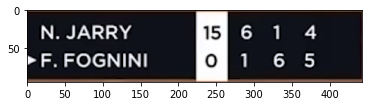

In [3]:
img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png')
plt.imshow(img)

In [4]:

import json

with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/top-100-shots-rallies-2018-atp-season-scoreboard-annotations.json') as f:
  data = json.load(f)

In [5]:

keys=natsorted(data.keys())
str(keys[-1]),len(keys)

('42117', 33174)

In [186]:
data['21371']

{'bbox': [193.27, 905.31, 525.2, 995.36],
 'name_1': 'Coric',
 'name_2': 'Djokovic',
 'score_1': '3-2-30',
 'score_2': '6-3-30',
 'serving_player': 'name_2'}

In [6]:
file_name_selected=keys[0::100]
# file_name_selected_train=set(keys)-set(file_name_selected)
# file_name_selected_train=natsorted(list(file_name_selected_train))
# file_name_selected_train

In [7]:
file_name_selected=keys[0::100]
file_name_selected_val=random.sample(file_name_selected, 100)

file_name_selected_train=set(file_name_selected)-set(file_name_selected_val)
file_name_selected_train=natsorted(list(file_name_selected_train))

print(len(file_name_selected),len(file_name_selected_train),len(file_name_selected_val))

332 232 100


In [8]:
from keras.models import load_model

# model=load_model('/content/drive/MyDrive/savormetrics/mask_rcnn_coco.h5')

In [7]:
# len(natsorted(data.keys()))
i=29223
j=str(keys[i])
bbox=list(map(int, data[str(keys[i])]['bbox']))
bbox

[193, 905, 552, 995]

In [8]:
data['29223']

{'bbox': [192.9, 904.94, 543.16, 995.51],
 'name_1': 'Tsitsipas',
 'name_2': 'Djokovic',
 'score_1': '6-6-2-15',
 'score_2': '3-7-0-30',
 'serving_player': 'name_1'}

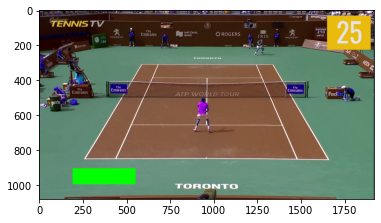

In [9]:
j=29223
img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+str(j)+'.png')
cv2.rectangle(img,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(0,255,0),-1)
plt.imshow(img)



In [ ]:
keys1=keys[:2]

In [ ]:
bbox

[194, 905, 641, 997]

In [ ]:
x=[bbox[0],bbox[2],bbox[2],bbox[0]]
y=[bbox[1],bbox[1],bbox[3],bbox[3]]
x,y

([194, 641, 641, 194], [905, 905, 997, 997])

In [ ]:
# %%capture cap --no-stderr
# f_no=1


# print('{')
# for i in range(len(keys1)-1):
#   bbox=list(map(int, data[str(keys1[i])]['bbox']))

#   print('"{0}.png":'.format(keys1[i]))
#   print('{{"filename":"{}.png","size":122,"regions":['.format(keys1[i]))
#   print('{{"shape_attributes":{{"name":"rect","x":{0},"y":{1},"width":{2},"height":{3}}},"region_attributes":{{"name":"scoreboard"}}}}]}},'.format(bbox[0],bbox[1],bbox[2]-bbox[0],bbox[3]-bbox[1]))


# i=-1
# bbox=list(map(int, data[str(keys1[i])]['bbox']))

# print('"{0}.png":'.format(keys1[i]))
# print('{{"filename":"{}.png","size":122,"regions":['.format(keys1[i]))
# print('{{"shape_attributes":{{"name":"rect","x":{0},"y":{1},"width":{2},"height":{3}}},"region_attributes":{{"name":"scoreboard"}}}}]}}'.format(bbox[0],bbox[1],bbox[2]-bbox[0],bbox[3]-bbox[1]))

# print('}')
## %%capture cap --no-stderr
# with open('via_region_data_train.json', 'w') as f:
#     f.write(cap.stdout)

In [ ]:
file_name_selected_train[1]

'200'

In [ ]:
%%capture cap --no-stderr
keys1=file_name_selected_train

print('{')
for i in range(len(keys1)-1):
  bbox=list(map(int, data[str(keys1[i])]['bbox']))

  print('"frame{0}.png":'.format(keys1[i]))
  print('{{"filename":"frame{}.png","size":122,"regions":['.format(keys1[i]))
  print('{{"shape_attributes":{{"name":"polygon","all_points_x":{0},"all_points_y":{1}}},"region_attributes":{{"name":"scoreboard"}}}}]}},'.format([bbox[0],bbox[2],bbox[2],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3]]))


i=-1
bbox=list(map(int, data[str(keys1[i])]['bbox']))

print('"frame{0}.png":'.format(keys1[i]))
print('{{"filename":"frame{}.png","size":122,"regions":['.format(keys1[i]))
print('{{"shape_attributes":{{"name":"polygon","all_points_x":{0},"all_points_y":{1}}},"region_attributes":{{"name":"scoreboard"}}}}]}}'.format([bbox[0],bbox[2],bbox[2],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3]]))

print('}')

with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/train_via_region_data.json', 'w') as f:
    f.write(cap.stdout)

In [ ]:
!cat /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/train_via_region_data.json

In [ ]:
%%capture cap --no-stderr
keys1=file_name_selected_val

print('{')
for i in range(len(keys1)-1):
  bbox=list(map(int, data[str(keys1[i])]['bbox']))

  print('"frame{0}.png":'.format(keys1[i]))
  print('{{"filename":"frame{}.png","size":122,"regions":['.format(keys1[i]))
  print('{{"shape_attributes":{{"name":"polygon","all_points_x":{0},"all_points_y":{1}}},"region_attributes":{{"name":"scoreboard"}}}}]}},'.format([bbox[0],bbox[2],bbox[2],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3]]))


i=-1
bbox=list(map(int, data[str(keys1[i])]['bbox']))

print('"frame{0}.png":'.format(keys1[i]))
print('{{"filename":"frame{}.png","size":122,"regions":['.format(keys1[i]))
print('{{"shape_attributes":{{"name":"polygon","all_points_x":{0},"all_points_y":{1}}},"region_attributes":{{"name":"scoreboard"}}}}]}}'.format([bbox[0],bbox[2],bbox[2],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3]]))

print('}')

with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/val_via_region_data.json', 'w') as f:
    f.write(cap.stdout)

In [ ]:
natsorted(file_name_selected_val)

In [ ]:
# %cd
  
!git clone --quiet https://github.com/matterport/Mask_RCNN.git

In [ ]:
!cp -r /content/Mask_RCNN /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/

In [ ]:
!cp -r /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/ /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames_val/

^C


In [ ]:
!pip install keras-ocr

In [11]:
!pip install tensorflow-gpu==1.15.2
!pip install keras==2.1.6
!pip install h5py==2.10.0
!pip install pycocotools
!pip install scikit-image
!pip install imgaug

!pip install keras-ocr
%cd /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/Mask_RCNN

!python setup.py install

!pip install pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'
!sudo apt install tesseract-ocr

/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask

In [69]:
%load_ext autoreload
%autoreload 2

In [12]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn import balloon
# from samples.balloon import balloon

%matplotlib inline 

AttributeError: ignored

In [13]:
config = balloon.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames")

In [14]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 100
Class Count: 2
  0. BG                                                
  1. balloon                                           


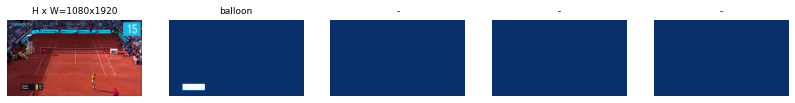

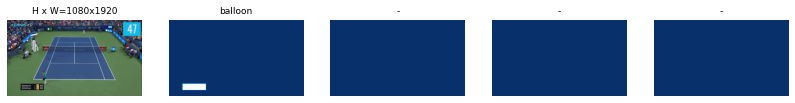

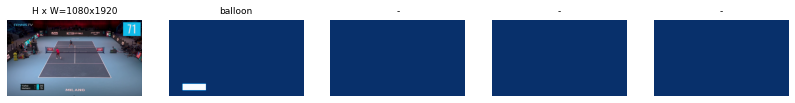

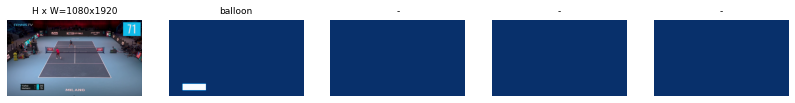

In [15]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [ ]:
!python /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/Mask_RCNN/mrcnn/balloon.py train --dataset=/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames  --weights=imagenet

Using TensorFlow backend.
Weights:  imagenet
Dataset:  /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames
Logs:  /content/drive/MyDrive/sportradar/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS      

In [16]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [17]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    # DETECTION_MIN_CONFIDENCE = 0.6
    # DETECTION_NMS_THRESHOLD=0.5


config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [18]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [19]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [20]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
#10640,7922,41435

In [21]:
model.load_weights("/content/drive/MyDrive/sportradar/logs/balloon20211026T1816/mask_rcnn_balloon_0030.h5", by_name=True)







Re-starting from epoch 30


In [22]:
missing=natsorted(list(
    set([i for i in range(int(keys[-1]))])-set(list(map(int,keys)))
    ))

30356
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
[193, 908, 526, 997]
[[904 198 999 641]]


True

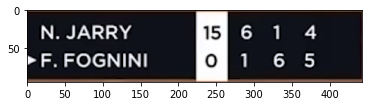

In [23]:
import cv2
i=random.randint(0,len(missing))
j=str(missing[i])

i=random.randint(0,len(keys))
j=str(keys[i])
j= str(30356)#
print(j)
image=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+j+'.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

results = model.detect([image], verbose=1)

# Display results
# ax = get_ax(1)
r = results[0]
print(len(r))

# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                             dataset.class_names, r['scores'], ax=ax,
#                             title="Predictions",show_mask=False)

# len(natsorted(data.keys()))
# i=29223
# j=str(keys[i])
bbox=list(map(int, data[str(keys[i])]['bbox']))
print(bbox)



print(r['rois'])
box=r['rois'][0]
res=image[box[0]:box[2],box[1]:box[3]]
roi_image=image[box[0]-25:box[2]+25,box[1]-25:box[3]+25]
plt.imshow(image[box[0]:box[2],box[1]:box[3]])
cv2.imwrite('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png',image[box[0]:box[2],box[1]:box[3]])

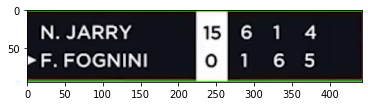

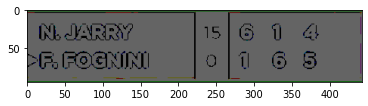

In [83]:
plt.imshow(res)
plt.show()
kernel = np.ones((2,2),np.uint8)
erosion = cv2.dilate(res,kernel,iterations = 1)

ret, imgf = cv2.threshold(res, 0, 100,cv2.THRESH_BINARY,cv2.THRESH_OTSU)


plt.imshow(imgf)

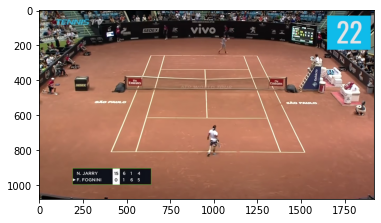

In [76]:
plt.imshow(image)
# res2=res[50:75,255:280]

In [ ]:
/content/drive/MyDrive/colab/keras-ocr/detector_2021-10-28T10:15:45.780672.h5

In [215]:
import string
alphabet = string.digits + string.ascii_letters + '.>'
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))

In [40]:
recognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet)

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [45]:
recognizer.model.load_weights("/content/drive/MyDrive/colab/keras-ocr/recognizer_2021-10-28T14:19:13.913034.h5")

In [58]:
alphabet = string.digits #+ string.ascii_letters 
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))


detector = keras_ocr.detection.Detector(weights='clovaai_general')
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)


# recognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet) # I give the alphabet so that it doesn't load the default weights
# recognizer.model.load_weights("/content/drive/MyDrive/colab/keras-ocr/recognizer_2021-10-28T14:19:13.913034.h5")


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Predicted: ['203195', '25955', '216262122', '2954', '20095115165', '22412122', '295', '2727']


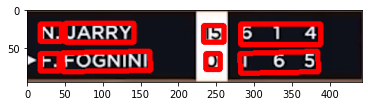

In [59]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline(recognizer=recognizer)

predictions = pipeline.recognize(images=[res])[0]

drawn = keras_ocr.tools.drawBoxes(
    image=res, boxes=predictions, boxes_format='predictions'
)
print(
    # 'Actual:', '\n'.join([' '.join([character for _, character in line]) for line in lines]),
    'Predicted:', [text for text, box in predictions])
plt.imshow(drawn)

In [88]:
predictions[0][1]

array([[ 50.,  17.],
       [141.,  17.],
       [141.,  42.],
       [ 50.,  42.]], dtype=float32)

In [26]:
!pip install keras-ocr

In [ ]:
cv2.imwrite('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png',image[box[0]:box[2],box[1]:box[3]])

True

In [71]:
predictions[2]

('614', array([[282.,  18.],
        [389.,  18.],
        [389.,  46.],
        [282.,  46.]], dtype=float32))

20 26 449 93


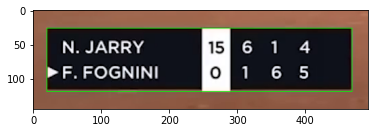

In [72]:
img=roi_image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(img, 170, 490)
# # Apply adaptive threshold
# thresh = cv2.adaptiveThreshold(edged, 255, 1, 1, 11, 2)
# thresh_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

# # apply some dilation and erosion to join the gaps - change iteration to detect more or less area's
# thresh = cv2.dilate(thresh,None,iterations = 15)
# thresh = cv2.erode(thresh,None,iterations = 15)

# Find the contours
contours,hierarchy = cv2.findContours(edged,
                                      cv2.RETR_TREE,
                                      cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    
    if((w>250)&(h>80)):
      print(x,y,w,h)
      cv2.rectangle(img,
                    (x,y),(x+w,y+h),
                    (0,255,0),
                    1)
      break
    
plt.imshow(img)

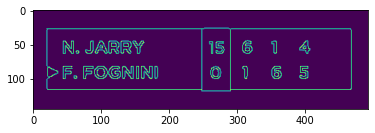

In [73]:
plt.imshow(edged)

In [27]:

model1 = ResNet.build(32, 32, 1, len(le.classes_), (3, 3, 3),
                     (64, 64, 128, 256), reg=0.0005)

NameError: ignored

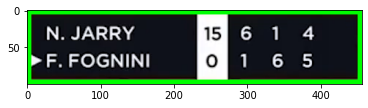

In [29]:
plt.imshow(roi_image[y:y+h,x:x+w])

In [ ]:
w

14

In [33]:
!pip install keras-ocr

     |████████████████████████████████| 41 kB 450 kB/s 
     |████████████████████████████████| 869 kB 5.5 MB/s 
     |████████████████████████████████| 123 kB 89.5 MB/s 
     |████████████████████████████████| 9.5 MB 49.1 MB/s 


In [ ]:
import pytesseract
img = roi_image[y:y+h,x:x+w]#cv2.imread('image.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'N. JARRY 15\nF. FOGNINI O Rie)\n\x0c'

In [37]:
import matplotlib.pyplot as plt

import keras_ocr
# detector=keras_ocr.detection.Detector()
# recognizer=keras_ocr.recognition.Recognizer(weights='captcha')

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in ['/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png','/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png'
    ]
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# # Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
# for ax, image, predictions in zip(axs, images, prediction_groups):
#     keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /root/.keras-ocr/crnn_kurapan.h5


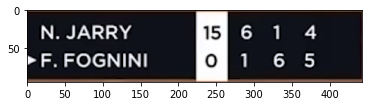

In [40]:
plt.imshow(res)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Predicted: ['jarry', 'na', '614', '15', 'fognini', '1165', 'f', 'o']


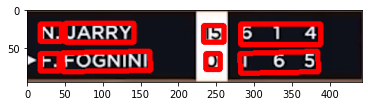

In [41]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

predictions = pipeline.recognize(images=[res])[0]

drawn = keras_ocr.tools.drawBoxes(
    image=res, boxes=predictions, boxes_format='predictions'
)
print(
    # 'Actual:', '\n'.join([' '.join([character for _, character in line]) for line in lines]),
    'Predicted:', [text for text, box in predictions])
plt.imshow(drawn)

In [ ]:
prediction_groups[0]

[('jarry', array([[ 50.,  17.],
         [141.,  17.],
         [141.,  42.],
         [ 50.,  42.]], dtype=float32)), ('ni', array([[17., 18.],
         [45., 18.],
         [45., 41.],
         [17., 41.]], dtype=float32)), ('614', array([[282.,  18.],
         [388.,  18.],
         [388.,  45.],
         [282.,  45.]], dtype=float32)), ('15', array([[233.,  20.],
         [260.,  20.],
         [260.,  42.],
         [233.,  42.]], dtype=float32)), ('fognini', array([[ 47.,  56.],
         [163.,  56.],
         [163.,  81.],
         [ 47.,  81.]], dtype=float32)), ('1165',
  array([[281.5584  ,  57.33604 ],
         [384.81885 ,  54.75453 ],
         [385.47778 ,  81.11305 ],
         [282.21735 ,  83.694565]], dtype=float32)), ('f', array([[17., 57.],
         [42., 57.],
         [42., 80.],
         [17., 80.]], dtype=float32)), ('o', array([[236.,  58.],
         [255.,  58.],
         [255.,  78.],
         [236.,  78.]], dtype=float32))]

In [ ]:
import numpy as np
import cv2
import scipy.ndimage as ndi

img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+j+'.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
smooth = ndi.filters.median_filter(gray, size=2)
edges = smooth > 170
kernel = np.ones((5,5),np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)



lines = cv2.HoughLines(closing.astype(np.uint8), 0.5, np.pi/180, 12)

for rho,theta in lines[0]:
    print(rho, theta)
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


plt.imshow(img)

TypeError: ignored

In [ ]:
corners = cv2.cornerHarris(gray, 9, 3, 0.01)

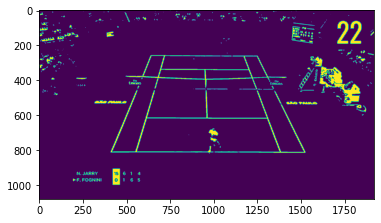

In [ ]:
plt.imshow(edges)

In [ ]:
cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

TypeError: ignored

In [33]:
!cp /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/Mask_RCNN/samples/coco/coco.py /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/Mask_RCNN/mrcnn

In [37]:
# from mrcnn import coco


# class InferenceConfig(coco.CocoConfig):
#     # Set batch size to 1 since we'll be running inference on
#     # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 1

# config = InferenceConfig()
# config.display()

# # Create model object in inference mode.
# model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# # Load weights trained on MS-COCO
# model.load_weights("/content/drive/MyDrive/savormetrics/mask_rcnn_coco.h5", by_name=True)

# # COCO Class names
# # Index of the class in the list is its ID. For example, to get ID of
# # the teddy bear class, use: class_names.index('teddy bear')
# class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
#                'bus', 'train', 'truck', 'boat', 'traffic light',
#                'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
#                'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
#                'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
#                'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
#                'kite', 'baseball bat', 'baseball glove', 'skateboard',
#                'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
#                'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
#                'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
#                'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
#                'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
#                'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
#                'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
#                'teddy bear', 'hair drier', 'toothbrush']


# results = model.detect([image], verbose=1)

# # Visualize results
# r = results[0]
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                             class_names, r['scores'])

In [63]:
/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data

SyntaxError: ignored

In [209]:

import json

with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/top-100-shots-rallies-2018-atp-season-scoreboard-annotations.json') as f:
  data = json.load(f)
keys=natsorted(data.keys())
str(keys[-1]),len(keys)

('42117', 33174)

In [210]:
file_name_selected=keys[0::100]
file_name_selected_val=random.sample(file_name_selected, 100)

file_name_selected_train=set(file_name_selected)-set(file_name_selected_val)
file_name_selected_train=natsorted(list(file_name_selected_train))

print(len(file_name_selected),len(file_name_selected_train),len(file_name_selected_val))

332 232 100


In [216]:

%%capture cap --no-stderr

keys=file_name_selected_train[:]
# print('[')
for i in range(len(keys)):
  img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+str(keys[i])+'.png')
  box=list(map(int, data[str(keys[i])]['bbox']))
  img=img[box[1]:box[3],box[0]:box[2]]
  img2 = img

  height, width, channels = img.shape
  # Number of pieces Horizontally 
  CROP_W_SIZE  = 1 
  # Number of pieces Vertically to each Horizontal  
  CROP_H_SIZE = 2 

  for ih in range(CROP_H_SIZE ):
      for iw in range(CROP_W_SIZE ):

          x = int(width/CROP_W_SIZE * iw)
          y = int(height/CROP_H_SIZE * ih)
          h = int((height / CROP_H_SIZE))
          w = int((width / CROP_W_SIZE ))
          # print(x,y,h,w)
          img = img[y:y+h, x:x+w]
          # print(ih)
          

          if(data[str(keys[i])]['serving_player']=='name_1'):
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)
          else:
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)




          
          img = img2
  # break
# print(']')  


with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/train_gt.txt', 'w') as f:
    f.write(cap.stdout)



In [208]:
!rm -r /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/*.*
!rm -r /content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/*.*

In [218]:

%%capture cap --no-stderr

keys=file_name_selected_val[:]
# print('[')
for i in range(len(keys)):
  img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+str(keys[i])+'.png')
  box=list(map(int, data[str(keys[i])]['bbox']))
  img=img[box[1]:box[3],box[0]:box[2]]
  img2 = img

  height, width, channels = img.shape
  # Number of pieces Horizontally 
  CROP_W_SIZE  = 1 
  # Number of pieces Vertically to each Horizontal  
  CROP_H_SIZE = 2 

  for ih in range(CROP_H_SIZE ):
      for iw in range(CROP_W_SIZE ):

          x = int(width/CROP_W_SIZE * iw)
          y = int(height/CROP_H_SIZE * ih)
          h = int((height / CROP_H_SIZE))
          w = int((width / CROP_W_SIZE ))
          # print(x,y,h,w)
          img = img[y:y+h, x:x+w]
          # print(ih)
          

          if(data[str(keys[i])]['serving_player']=='name_1'):
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)
          else:
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)




          
          img = img2
  # break
# print(']')  


with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/val_gt.txt', 'w') as f:
    f.write(cap.stdout)



In [315]:

%%capture cap --no-stderr
with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/val_gt2.txt', 'w') as f:
    f.write(cap.stdout)


keys=file_name_selected_val[:]
# print('[')
for i in range(len(keys)):
  img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+str(keys[i])+'.png')
  box=list(map(int, data[str(keys[i])]['bbox']))
  img=img[box[1]:box[3],box[0]:box[2]]
  img2 = img

  height, width, channels = img.shape
  # Number of pieces Horizontally 
  CROP_W_SIZE  = 1 
  # Number of pieces Vertically to each Horizontal  
  CROP_H_SIZE = 2 

  for ih in range(CROP_H_SIZE ):
      for iw in range(CROP_W_SIZE ):

          x = int(width/CROP_W_SIZE * iw)
          y = int(height/CROP_H_SIZE * ih)
          h = int((height / CROP_H_SIZE))
          w = int((width / CROP_W_SIZE ))
          # print(x,y,h,w)
          img = img[y:y+h, x:x+w]
          # print(ih)
          

          if(data[str(keys[i])]['serving_player']=='name_1'):
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,> {0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)
          else:
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,> {0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)




          
          img = img2
  # break
# print(']')  





In [317]:

%%capture cap --no-stderr
with open('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/train_gt2.txt', 'w') as f:
    f.write(cap.stdout)


keys=file_name_selected_train[:]
# print('[')
for i in range(len(keys)):
  img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/data/frames/frame'+str(keys[i])+'.png')
  box=list(map(int, data[str(keys[i])]['bbox']))
  img=img[box[1]:box[3],box[0]:box[2]]
  img2 = img

  height, width, channels = img.shape
  # Number of pieces Horizontally 
  CROP_W_SIZE  = 1 
  # Number of pieces Vertically to each Horizontal  
  CROP_H_SIZE = 2 

  for ih in range(CROP_H_SIZE ):
      for iw in range(CROP_W_SIZE ):

          x = int(width/CROP_W_SIZE * iw)
          y = int(height/CROP_H_SIZE * ih)
          h = int((height / CROP_H_SIZE))
          w = int((width / CROP_W_SIZE ))
          # print(x,y,h,w)
          img = img[y:y+h, x:x+w]
          # print(ih)
          

          if(data[str(keys[i])]['serving_player']=='name_1'):
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,> {0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)
          else:
            
            if(ih==0):
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_0"+  ".png"
              print("{2},None,{0} {1}".format(data[str(keys[i])]['name_1'],data[str(keys[i])]['score_1'].replace('-',' '),path))
              cv2.imwrite(path,img)
            else:
              path="/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/" + str(keys[i])+"_1"+  ".png"
              print("{2},None,> {0} {1}".format(data[str(keys[i])]['name_2'],data[str(keys[i])]['score_2'].replace('-',' '),path))
              cv2.imwrite(path,img)




          
          img = img2
  # break
# print(']')  





In [252]:
import random
import string
import math
import itertools
import os

import numpy as np
import imgaug
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection

import keras_ocr

assert tf.test.is_gpu_available()

train_labels1 = keras_ocr.datasets.get_born_digital_recognizer_dataset(
    split='train',
    cache_dir='.'
)
test_labels1 = keras_ocr.datasets.get_born_digital_recognizer_dataset(
    split='test',
    cache_dir='.'
)
train_labels1 = [(filepath, box, word.lower()) for filepath, box, word in train_labels1]
test_labels1 = [(filepath, box, word.lower()) for filepath, box, word in test_labels1]

Looking for ./borndigital/Challenge1_Training_Task3_Images_GT.zip
Looking for ./borndigital/Challenge1_Test_Task3_Images.zip
Looking for ./borndigital/test/Challenge1_Test_Task3_GT.txt


In [18]:
import random
import string
import math
import itertools
import os

import numpy as np
import imgaug
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection

import keras_ocr

assert tf.test.is_gpu_available()



Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [318]:
import csv
train_gt = csv.reader(open("/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/train/train_gt2.txt"))
train_labels=[]
for i in train_gt:
  train_labels.append(i)

for i in range(len(train_labels)):
  train_labels[i][1] =None

# for i in range(len(train_labels)):
  # train_labels[i][-1] =train_labels[i][-1].lower()
  # train_labels[i][-1] =train_labels[i][-1].replace(' ','')
  # train_labels[i][-1] =train_labels[i][-1].replace('.','')
  # train_labels[i][-1] =train_labels[i][-1].replace(' ','')


import csv
val_gt = csv.reader(open("/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_data/val/val_gt2.txt"))
val_labels=[]
for i in val_gt:
  val_labels.append(i)  

for i in range(len(val_labels)):
  val_labels[i][1] =None

# for i in range(len(val_labels)):
  # val_labels[i][-1] = val_labels[i][-1].lower()
  # val_labels[i][-1] = val_labels[i][-1].replace(' ','')
  # val_labels[i][-1] = val_labels[i][-1].replace('.','')
  # val_labels[i][-1] = val_labels[i][-1].replace(' ','')



In [292]:
train_labels2=np.concatenate((train_labels1,train_labels))

In [293]:
val_labels2=np.concatenate((test_labels1,val_labels))

In [319]:
print(len(train_labels),len(val_labels))

464 200


In [284]:
val_labels2[-1][-1]#.replace('. ','.')

'raonic7610'

In [43]:
x=train_labels[1][-1]
# x = None if x == 'None' else x
print(x.lower())


h. zeballos 15 6 3 1


In [321]:
import string
alphabet = string.digits + string.ascii_letters +'.'+' '+'>'
alphabet = ''.join(sorted(set(alphabet)))
alphabet

' .0123456789>ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

'0123456789abcdefghijklmnopqrstuvwxyz'

In [322]:
alphabet = ' .0123456789>ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
recognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet, weights=None)

recognizer.compile()
batch_size = 10
augmenter = imgaug.augmenters.Sequential([
    imgaug.augmenters.GammaContrast(gamma=(0.25, 3.0)),
])

train_labels, validation_labels = train_labels,val_labels#sklearn.model_selection.train_test_split(train_labels, test_size=0.2, random_state=42)
(training_image_gen, training_steps), (validation_image_gen, validation_steps) = [
    (
        keras_ocr.datasets.get_recognizer_image_generator(
            labels=labels,
            height=recognizer.model.input_shape[1],
            width=recognizer.model.input_shape[2],
            alphabet=alphabet,#recognizer.alphabet,
            augmenter=augmenter
        ),
        len(labels) // batch_size
    ) for labels, augmenter in [(train_labels, augmenter), (validation_labels, None)]     
]
training_gen, validation_gen = [
    recognizer.get_batch_generator(
        image_generator=image_generator,
        batch_size=batch_size
    )
    for image_generator in [training_image_gen, validation_image_gen]
]

In [ ]:
next(training_gen)

text: > Chung 3 6 0 30


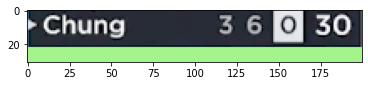

In [328]:
image, text = next(training_image_gen)
print('text:', text)
_ = plt.imshow(image)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=False),
    tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_trained/recognizer_atp+spl_trained_6.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_trained/recognizer_borndigital.csv')
]
recognizer.training_model.fit_generator(
    generator=training_gen,
    steps_per_epoch=training_steps,
    validation_steps=validation_steps,
    validation_data=validation_gen,
    callbacks=callbacks,
    epochs=1000
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
Cause: could not parse the source code of <function Recognizer.compile.<locals>.<lambda> at 0x7f684f9e4560>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function Recognizer.compile.<locals>.<lambda> at 0x7f684f9e4560>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
46/46 [==============================] - 12s 112ms/step - loss: 54.0420 - val_loss: 43.6853


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/1000
46/46 [==============================] - 4s 78ms/step - loss: 42.6344 - val_loss: 42.0998
Epoch 3/1000
46/46 [==============================] - 4s 78ms/step - loss: 41.1454 - val_loss: 40.3291
Epoch 4/1000
46/46 [==============================] - 4s 79ms/step - loss: 38.6767 - val_loss: 38.2040
Epoch 5/1000
46/46 [==============================] - 4s 78ms/step - loss: 37.3260 - val_loss: 37.5604
Epoch 6/1000
46/46 [==============================] - 4s 79ms/step - loss: 37.4287 - val_loss: 36.9347
Epoch 7/1000
46/46 [==============================] - 4s 78ms/step - loss: 36.6450 - val_loss: 37.0158
Epoch 8/1000
46/46 [==============================] - 4s 78ms/step - loss: 36.0396 - val_loss: 35.7163
Epoch 9/1000
46/46 [==============================] - 4s 81ms/step - loss: 36.0280 - val_loss: 35.6514
Epoch 10/1000
46/46 [==============================] - 4s 80ms/step - loss: 35.7377 - val_loss: 36.4181
Epoch 11/1000
46/46 [==============================] - 4s 81ms/step - lo

In [246]:
recognizer.model.load_weights('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/ocr_trained/recognizer_atp_trained_4.h5')

Predicted: medvedev42, Actual: medvedev42


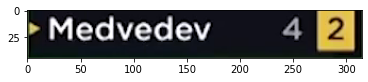

In [247]:
image_filepath, _, actual = val_labels[random.randint(0,len(val_labels))]
predicted = recognizer.recognize(image_filepath)
print(f'Predicted: {predicted}, Actual: {actual}')

_ = plt.imshow(keras_ocr.tools.read(image_filepath))

Predicted: njarry15614


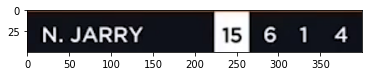

In [248]:
img=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png')[0:50,0:400]
# cv2.imwrite('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/2.png',img)
plt.imshow(img)

predicted = recognizer.recognize('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/2.png')
print(f'Predicted: {predicted}')


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Predicted: ['fognini', '1165', 'f', 'o']


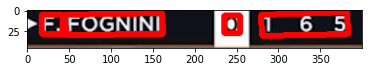

In [251]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()
res=cv2.imread('/content/drive/MyDrive/sportradar/CV-interview-scoreboard-task-material/1.png')[50:100,0:400]
predictions = pipeline.recognize(images=[res])[0]

drawn = keras_ocr.tools.drawBoxes(
    image=res, boxes=predictions, boxes_format='predictions'
)
print(
    # 'Actual:', '\n'.join([' '.join([character for _, character in line]) for line in lines]),
    'Predicted:', [text for text, box in predictions])
plt.imshow(drawn)

In [110]:
	# "16879": {
	# 	"bbox": [
	# 		192.57,
	# 		907.2,
	# 		526.34,
	# 		996.7
	# 	],
	# 	"serving_player": "name_1",
	# 	"name_1": "A. Zverev",
	# 	"name_2": "Isner",
	# 	"score_1": "7-4-Ad",
	# 	"score_2": "6-5"
	# },

'999'